# Thông Tin
1. MSSV: 20520079
2. Họ và tên: Nguyễn Tư Thành Nhân
3. Bài tập: Bài tập 5
4. Ngày thực hiện: 29/04/2022

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
%cd /content/drive/MyDrive/CS231.M21.KHTN/Baitap/Baitap5/images

/content/drive/.shortcut-targets-by-id/13C37EedUSDnRymGA5rWpsqcry8w0txyr/CS231.M21.KHTN/Baitap/Baitap5/images


# Thực hành 1.
- Áp dụng phân đoạn ảnh cho các ảnh:
1. Chọn ngưỡng: global
- particles.bmp
- Phandoan01.jpg
- wdg2.jpg
- Rice.png
2. Chọn ngưỡng: Adaptive
- Ảnh wdg3.jpg

In [ ]:
!pip install fuzzy-c-means

     |████████████████████████████████| 10.9 MB 8.2 MB/s 


In [ ]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import imutils
from imutils import opencv2matplotlib
from google.colab.patches import cv2_imshow
from sklearn.cluster import KMeans
from fcmeans import FCM
from sklearn.cluster import MeanShift, estimate_bandwidth
from sklearn.datasets import make_blobs

In [ ]:
def drawHist(x, title):
    hist = cv2.calcHist([x], [0], None, [256], [0, 256])
    plt.plot(hist)
    plt.xlim([0, 256])
    plt.legend(('histogram'), loc = 'upper left')
    plt.title(title)
    plt.show()

In [ ]:
def globalThresholding(img, thres, opt = 0):
    img_rst = img.copy()
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            if img_rst[i][j] < thres:
                img_rst[i][j] = 255
            else:
                img_rst[i][j] = 0
            if opt != 0:
                img_rst[i][j] = 255 - img_rst[i][j]
    return img_rst

In [ ]:
def adaptiveThresholding(f, nrow, ncol):
    g = f.copy()
    r = int(f.shape[0] / nrow)
    c = int(f.shape[1] / ncol)
    for i in range(int(nrow)):
        for j in range(int(ncol)):
            x = f[i * r : (i + 1) * r, j * c : (j + 1) * c]
            cv2_imshow(x)
            drawHist(x, str(i)+str(j))
            # t = np.average(x)
            t = int(input())
            g[i * r : (i + 1) * r, j * c : (j + 1) * c] = globalThresholding(x, t)
    return g

In [ ]:
def show2Images(img_auth, img_seg, title_auth = 'Origin Image', title_seg = 'Image Segmented'):
    plt.figure(figsize=(14, 7))
    plt.subplot(1,2,1)
    plt.imshow(img_auth, cmap = 'gray')
    plt.title(title_auth)

    plt.subplot(1,2,2)
    plt.imshow(img_seg, cmap = 'gray')
    plt.title(title_seg)

In [ ]:
def showGlob(img_src, thres, opt = 0):
    img_auth = cv2.imread(img_src, 0)
    img_seg = globalThresholding(img_auth, thres, opt)
    show2Images(img_auth, img_seg)

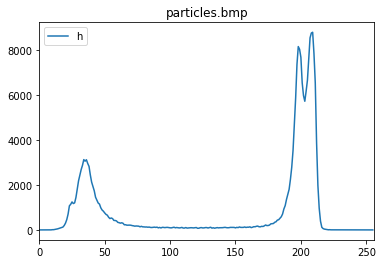

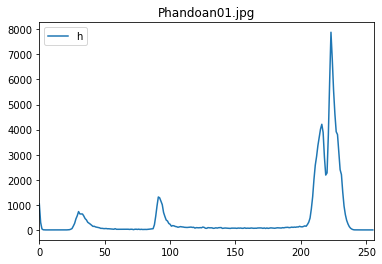

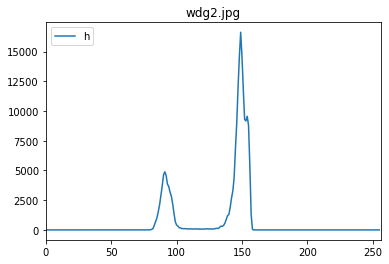

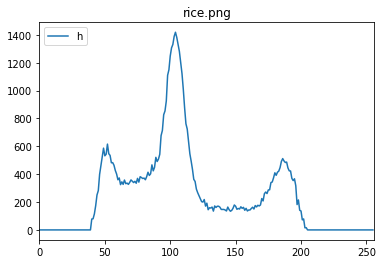

In [ ]:
for img_src in ['particles.bmp', 'Phandoan01.jpg', 'wdg2.jpg', 'rice.png']:
    img = cv2.imread(img_src)
    drawHist(img, img_src)

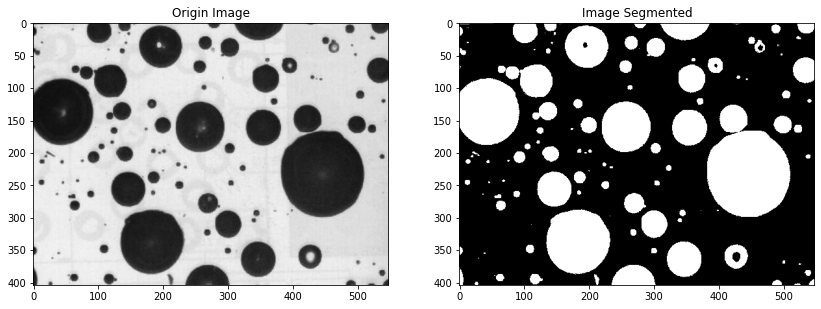

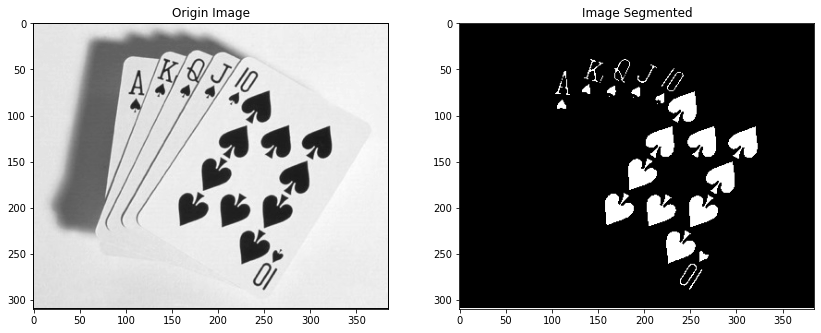

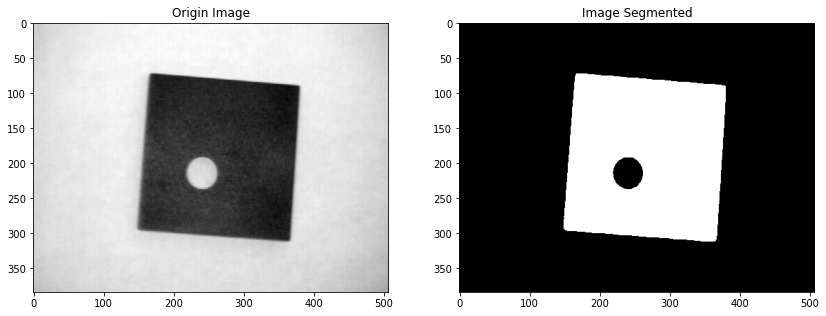

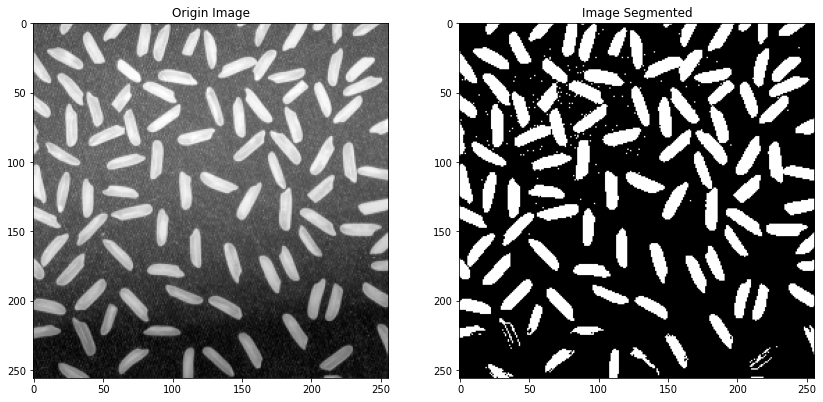

In [ ]:
showGlob('particles.bmp', 127)
showGlob('Phandoan01.jpg', 63)
showGlob('wdg2.jpg', 127)
showGlob('rice.png', 127, 1)

In [ ]:
# opt = 0 - Input; 1 - Average
def showAdaptive(img_src, nrow, ncol):
    img_auth = cv2.imread(img_src, 0)
    img_seg = adaptiveThresholding(img_auth, nrow, ncol)
    show2Images(img_auth, img_seg)

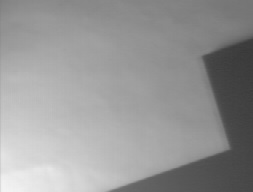

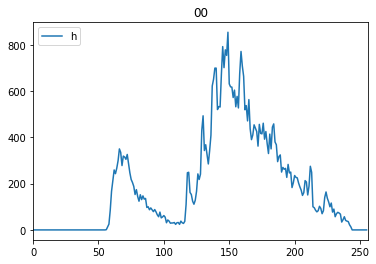

127


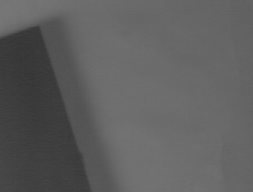

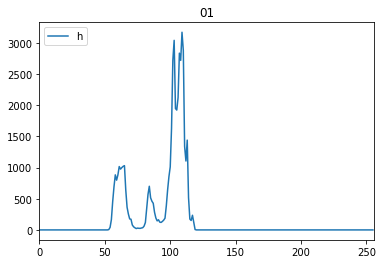

63


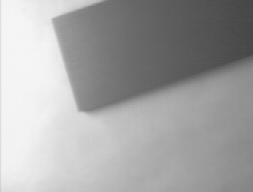

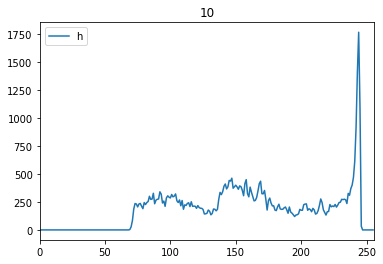

127


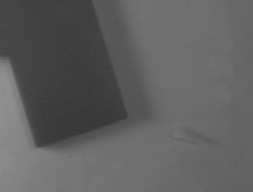

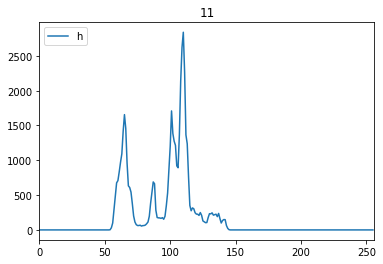

87


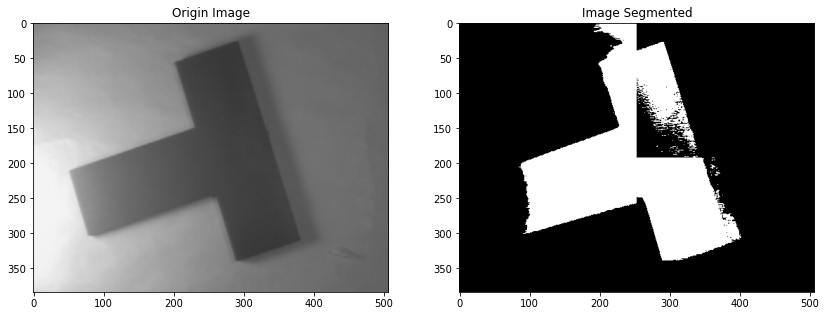

In [ ]:
showAdaptive('wdg3.jpg', 2, 2)

# Thực hành 2
- Representing each pixel as (r,g,b)
  - Áp dụng cho ảnh: vegetables.jpg, hand.jpg,
thuoc.jpg
- Represent each pixel as (r,g,b,x,y)
  - Áp dụng cho ảnh: vegetables.jpg và thuoc.jpg

Các thuật toán: Kmean

- Representing each pixel as (r,g,b)
  -  Áp dụng cho 4 ảnh: vegetables.jpg, hand.jpg,
thuoc.jpg và dogcat.jpg

- Represent each pixel as (r,g,b,x,y)
  - Áp dụng cho ảnh: vegetables.jpg và thuoc.jpg

Các thuật toán: MeanShift, FCM

In [ ]:
def show2Images(img_auth, img_seg, title_auth = 'Origin Image', title_seg = 'Image Segmented'):
    plt.figure(figsize=(14, 7))
    plt.subplot(1,2,1)
    plt.imshow(opencv2matplotlib(img_auth))
    plt.title(title_auth)

    plt.subplot(1,2,2)
    plt.imshow(opencv2matplotlib(img_seg))
    plt.title(title_seg)

In [ ]:
def Segmentation(img_src, n_clusters = 7, RGB = 0, Seg = 0):
    img = cv2.imread(img_src)

    img_tmp = img.copy()
    nrow, ncol,nchl = img.shape
    g = []
    for y in range(nrow):
        for x in range(ncol):
            if RGB == 0:
                tmp = [img_tmp[y,x][0], img_tmp[y,x][1], img_tmp[y,x][2]]
            else:
                tmp = [img_tmp[y,x][0], img_tmp[y,x][1], img_tmp[y,x][2], x, y]
            g.append(tmp)
    g = np.array(g)
    
    if Seg == 0:
        k_means = KMeans(n_clusters=n_clusters, random_state=0).fit(g)
        # t = k_means.cluster_centers_[k_means.labels_]
        arrcolor = np.random.rand(20,3) * 255
        t = arrcolor[k_means.labels_]
        img_res = img_tmp
        i = 0
        for y in range(nrow):
            for x in range(ncol):
                img_res[y, x] = t[i][0:3]
                i += 1
        algorithm = 'Kmeans'

    if Seg == 1:
        band = estimate_bandwidth(g, n_samples=1000)
        ms = MeanShift(bandwidth=band, bin_seeding= True)
        ms.fit(g)
        labels = ms.labels_
        cluster_centers = ms.cluster_centers_
        tt = cluster_centers[labels]
        t = tt[:,0:3]
        img_res = t.reshape(nrow, ncol, nchl)
        img_res = img_res.astype(np.uint8)

        n_clusters = len(np.unique(labels))
        algorithm = 'Mean Shift'

    if Seg == 2:
        fcm = FCM(n_clusters = n_clusters)
        fcm.fit(g)
        fcm_centers = fcm.centers
        fcm_labels = fcm.predict(g)
        tt = fcm_centers[fcm_labels]
        t = tt[:,0:3]
        img_res = t.reshape(nrow, ncol, nchl)
        img_res = img_res.astype(np.uint8)
        algorithm = 'FCM'
    
    if RGB == 0:
        ans = ''
    else:
        ans = 'xy'
    
    show2Images(img, img_res, 'Origin {}'.format(img_src), 'Image Segmented using {} and n_clusters = {:d} with RGB{}'.format(algorithm, n_clusters, ans))

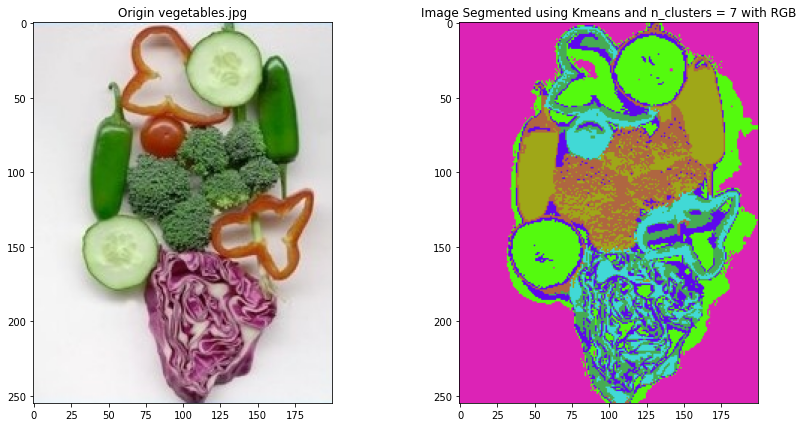

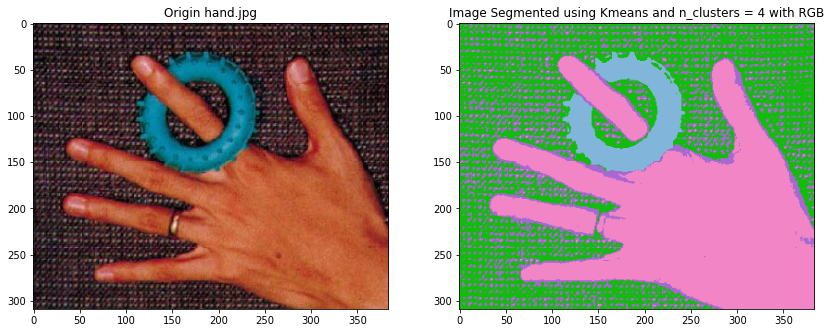

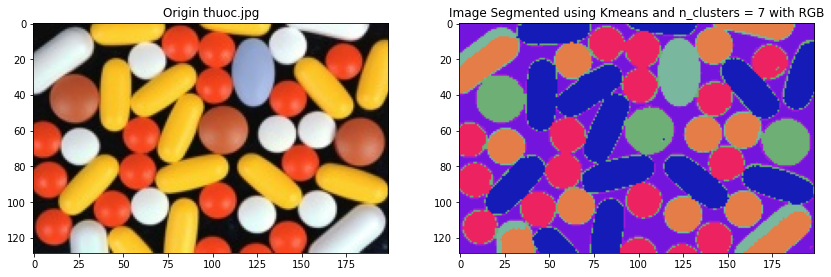

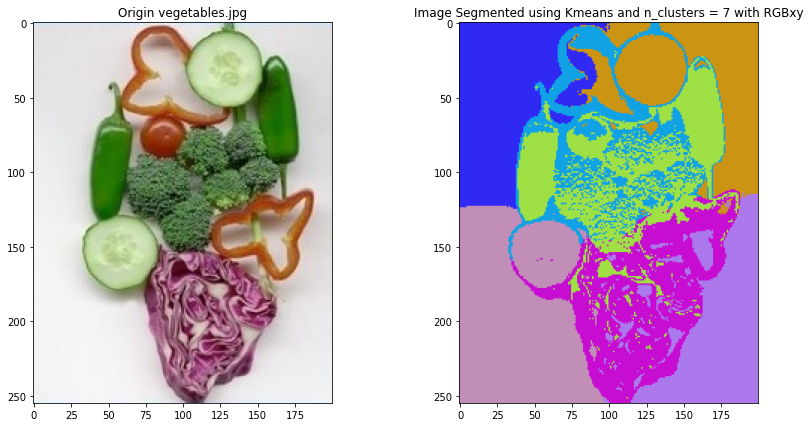

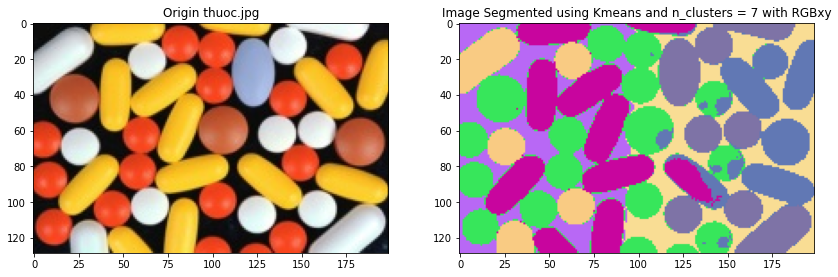

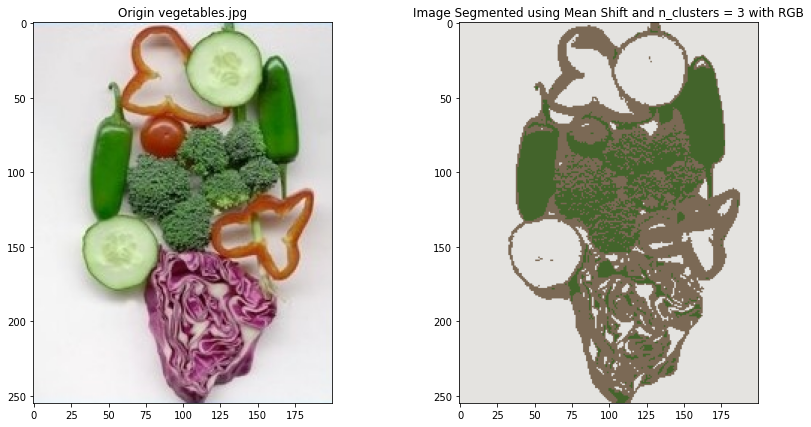

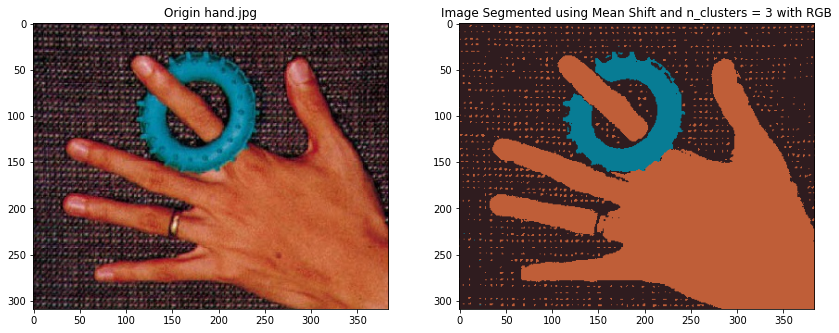

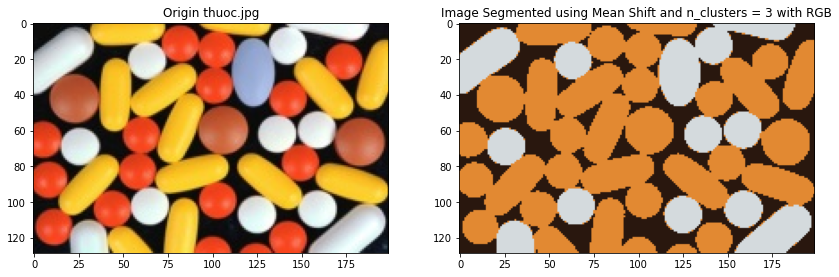

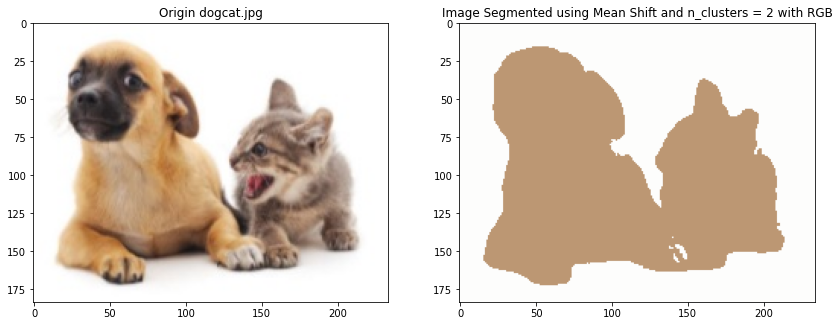

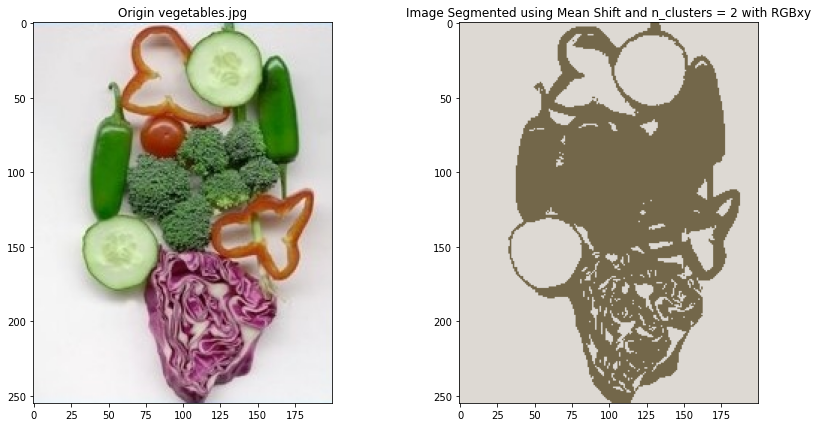

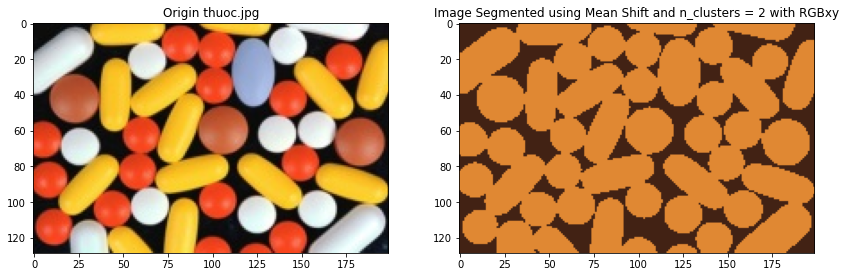

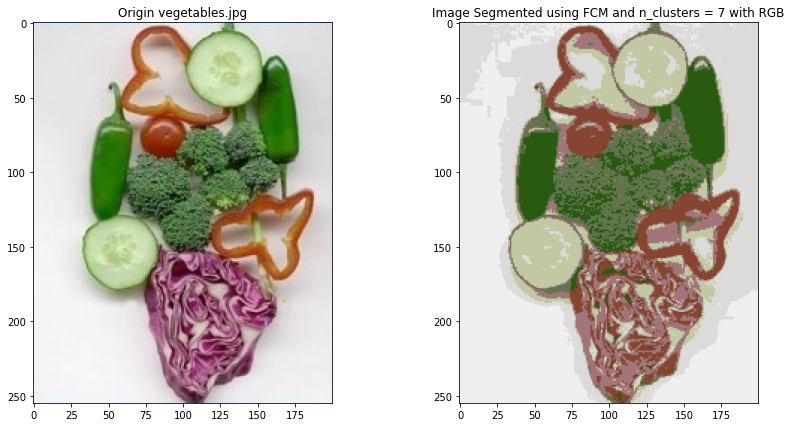

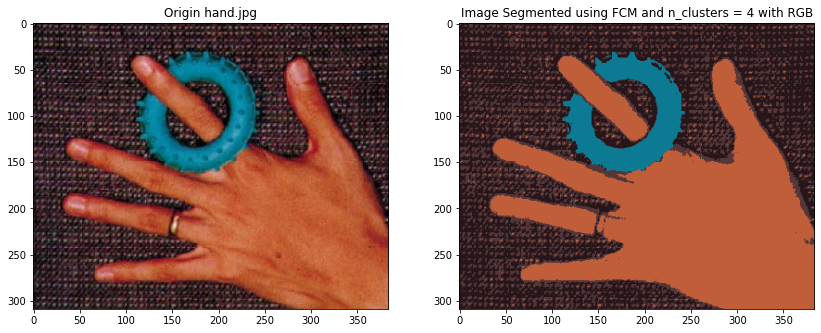

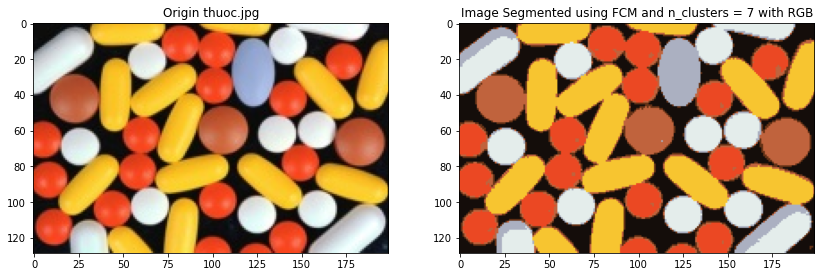

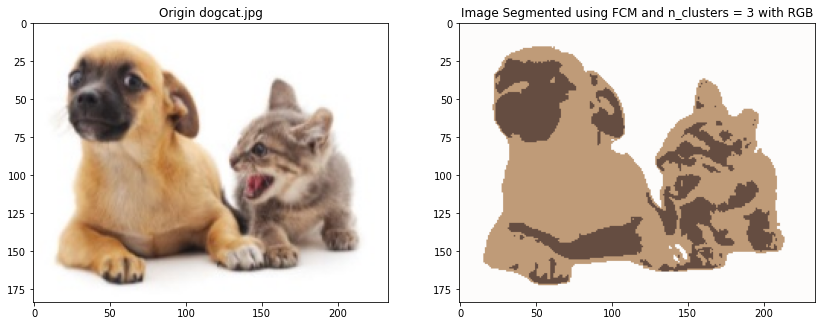

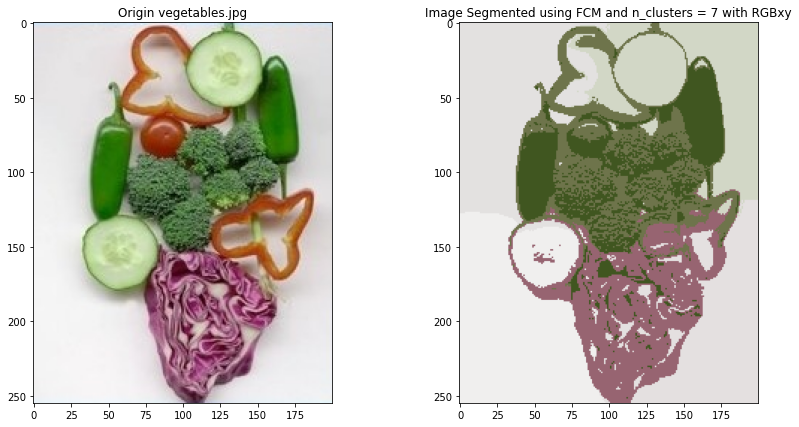

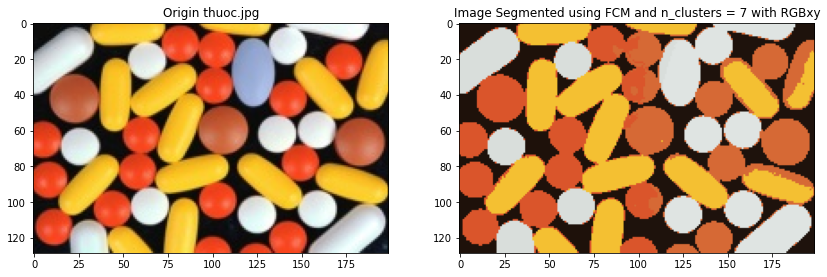

In [ ]:
# RGB = 0 -> RGB, RGB = 1 -> RGBxy
# Seg = 0 -> Kmean, Seg = 1 -> Meanshift, Seg = 1 -> FCM
# Kmean with RGB
Segmentation('vegetables.jpg', n_clusters = 7, RGB = 0, Seg = 0)
Segmentation('hand.jpg', n_clusters = 4, RGB = 0, Seg = 0)
Segmentation('thuoc.jpg', n_clusters = 7, RGB = 0, Seg = 0)

# Kmean with RGBxy
Segmentation('vegetables.jpg', n_clusters = 7, RGB = 1, Seg = 0)
Segmentation('thuoc.jpg', n_clusters = 7, RGB = 1, Seg = 0)

# Meanshift with RGB
Segmentation('vegetables.jpg', RGB = 0, Seg = 1)
Segmentation('hand.jpg', RGB = 0, Seg = 1)
Segmentation('thuoc.jpg', RGB = 0, Seg = 1)
Segmentation('dogcat.jpg', RGB = 0, Seg = 1)


# Meanshift with RGBxy
Segmentation('vegetables.jpg', RGB = 1, Seg = 1)
Segmentation('thuoc.jpg', RGB = 1, Seg = 1)

# FCM with RGB
Segmentation('vegetables.jpg', n_clusters = 7, RGB = 0, Seg = 2)
Segmentation('hand.jpg', n_clusters = 4, RGB = 0, Seg = 2)
Segmentation('thuoc.jpg', n_clusters = 7, RGB = 0, Seg = 2)
Segmentation('dogcat.jpg', n_clusters = 3, RGB = 0, Seg = 2)

# FCM with RGBxy
Segmentation('vegetables.jpg', n_clusters = 7, RGB = 1, Seg = 2)
Segmentation('thuoc.jpg', n_clusters = 7, RGB = 1, Seg = 2)